# Introduction to TensorFlow and Keras

> TensorFlow is an end-to-end open source platform for machine learning. It has a comprehensive, flexible ecosystem of tools, libraries, and community resources that lets researchers push the state-of-the-art in ML and developers easily build and deploy ML-powered applications.   
[Official website](https://www.tensorflow.org/)

![](https://upload.wikimedia.org/wikipedia/commons/thumb/1/11/TensorFlowLogo.svg/1200px-TensorFlowLogo.svg.png)

#### What is TensorFlow?

TensorFlow is the most popular library for training **Neural Networks**. In its core, however, TensorFlow is nothing more than a symbolic math library. What it does is it registers mathematical operations in what is known as a computation graph and executes them. The flow of data (which are stored in tensors) through the graph is what gives this library its name.

#### Implementation details

TensorFlow's most basic operations are essentially written in C++ and CUDA for GPU computations. The most popular way, however, to interact with the library is through its Python API, which is what we'll be learning

#### Versions

We are currently in the 2nd version of TensorFlow, i.e. TF2 which has seen major revams in most of its APIs and functionalities. For this tutorial make sure you are running a version of TF >= 2.0. This tutorial **is not compatible with versions below 2.0.0**.

## Keras

Writing native TensorFlow can be challenging, due to the low-level nature of the library. In native TF, we need to define everything in terms of tensors and operations. However, larger NNs might require hundreds or thousands of these operations. Fortunately, a lot of the operations are repeated again and again and can be abstracted. This is exactly what Keras does! As the docs state: 

> Keras is a deep learning API written in Python, running on top of the machine learning platform TensorFlow. It was developed with a focus on enabling fast experimentation.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/a/ae/Keras_logo.svg/1024px-Keras_logo.svg.png)

## Tutorial structure 

This present tutorial one of two parts:

- TF 101: Soft intro to TF through the keras API. Learn how to define, parametrize and train models in keras, while introducing basic concepts of DL.
- TF 102: Deep dive into TF. Learn how TF works behind the hood. Learn how to customize models and training even further through TF's native low-level interface.


# 1.  Intro to keras

In this tutorial we will learn how to:

- define keras models
- customize their architecture
- train the models we defined
- evaluate their performance

Let's first import the necessary libraries

In [1]:
import tensorflow as tf
assert tf.__version__[0] == '2', 'this tutorial is for tensorflow versions of 2 or higher'

import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

2023-03-11 12:09:58.496017: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-11 12:09:59.461597: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-11 12:09:59.461672: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-11 12:10:01.826191: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

We'll work on a dummy dataset so that we can better visualize the impact of our models.

Text(0.5, 1.0, 'Test set')

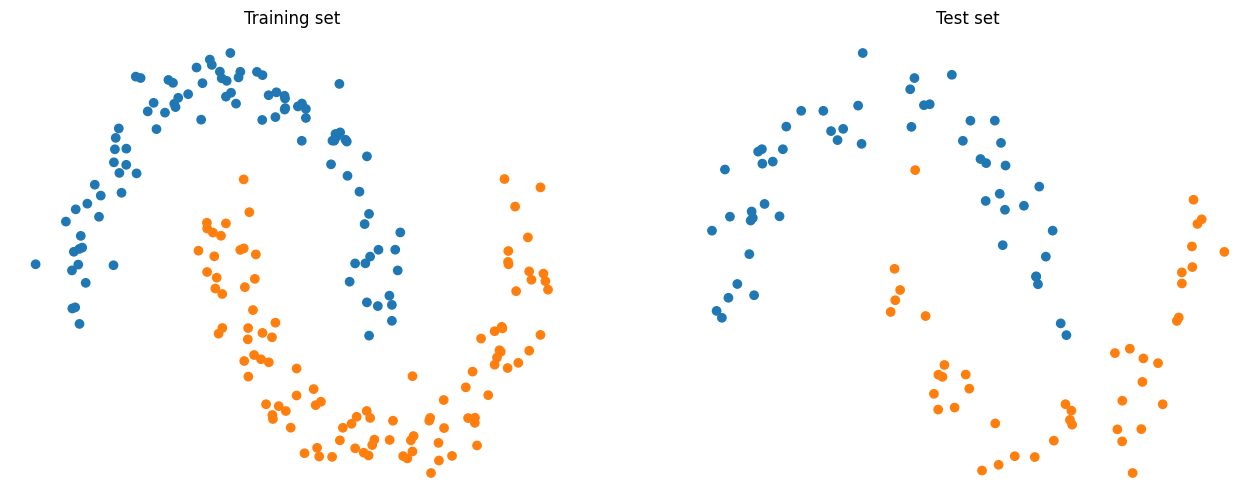

In [2]:
np.random.seed(13)

X, y = make_moons(300, noise=0.1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

######################################################################
############################## PLOTTING ##############################
######################################################################
plt.figure(figsize=(16, 6))

ax = plt.subplot(121)
colors = ['C' + str(i) for i in y_train]
ax.scatter(X_train[:, 0], X_train[:, 1], c=colors)
ax.axis('off')
ax.set_title('Training set')

ax = plt.subplot(122)
colors = ['C' + str(i) for i in y_test]
ax.scatter(X_test[:, 0], X_test[:, 1], c=colors)
ax.axis('off')
ax.set_title('Test set')

Keras is essentially a high-level API to TensorFlow, intended for building and training Neural Networks. As quoted by the [official guide](https://www.tensorflow.org/guide/keras) it is:

>- *User-friendly*  
Keras has a simple, consistent interface optimized for common use cases. It provides clear and actionable feedback for user errors.
>- *Modular and composable*  
Keras models are made by connecting configurable building blocks together, with few restrictions.
>- *Easy to extend*  
Write custom building blocks to express new ideas for research. Create new layers, metrics, loss functions, and develop state-of-the-art models.

In this tutorial we'll attempt to introduce Keras' basic functionality through various endeavours to solve the aforementioned *moons* problem. These endeavours will be presented as *case studies*, through which build increasingly more complex approaches.

## Case study 1: Logistic Regression

### Building a model

Let's start of by creating our first model. To keep this simple we'll start by training a simple 1-layer Neural Network, which is essentially a logitstic regression model. This model essentially performs the operation:

$$
\hat y = \sigma (X \cdot W + b)
$$

where $\hat y$ are the model's predictions, $\sigma$ is the [sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function), $W$ is a matrix of parameters, referred to as *weights*, $X$ are the inputs and $b$ are another set of parameters called *biases*. This operation is performed by keras' [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) layer.

In [3]:
# Input layer: this has no trainable parameters, but helps keras know the
# shape of the input it will be expecting.
inp = tf.keras.layers.Input(shape=(2,)) 

# Output layer: will be a Dense layer with 1 neuron and a sigmoid 
# activation. This layer is connected after layer 'inp', i.e. its input is layer
# inp's output.
out = tf.keras.layers.Dense(1, activation='sigmoid')(inp)

# Define a keras model whose input is layer 'inp' and output is layer 'out'
log_regressor = tf.keras.models.Model(inp, out)

2023-03-09 22:52:42.989869: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-09 22:52:42.989901: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-09 22:52:42.989926: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (home): /proc/driver/nvidia/version does not exist
2023-03-09 22:52:42.990185: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


One thing we need to explicitly tell keras, when building the model, is the shape our input will have. It doesn't care about how many samples we have, rather how many **features** the input has. In our case, we have $2$ input features so we'll define an input shape of `(2,)`. Likewise, the output layer needs to have exactly $1$ output, because we are dealing with a binary classification problem. The architecture we followed can be seen in the figure below:

![](https://github.com/djib2011/tensorflow-training/blob/main/figures/logistic_regression.png)

Keras represents the Neural Network as an object it calls a **model**. The model has many functions, like `.fit()`, `.predict()`, etc., through which we can use it.

One way to inspect if we've defined the model correctly is to use the `.summary()` method which prints out information about out network's architecture, like its layers, their sizes and output shapes, its trainable parameters, etc.

In [28]:
log_regressor.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


We can see here that our network consists of the two layers we defined. Only the dense layer has any trainable parameters. Out of these $3$ params, $2$ come from the weight matrix $W$ ($1$ for each input) and $1$ comes from the bias $b$.

At the moment, we've just defined the model, but it is still untrained.

In [4]:
preds = log_regressor.predict(X_test)
print(f'accuracy: {accuracy_score(y_test, np.where(preds > 0.5, 1, 0))*100}%')

4/4 [==============================] - 0s 1ms/step
accuracy: 54.54545454545454%


Let's visualize the untrained model's decision boundaries

In [3]:
######################################################################
############################## PLOTTING ##############################
######################################################################

def visualize_decision_boundary(model):
    """
    Helper function that visualizes a model's decision boundary on the
    previously defined moons dataset
    """
    # Find out where to start and end the mesh
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

    # Generate the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05, dtype=np.float32),
                         np.arange(y_min, y_max, 0.05, dtype=np.float32))

    # Generate predictions for each point of the mesh
    mesh_preds = model(np.c_[xx.ravel(), yy.ravel()]).numpy()

    # We'll also create a custom diverging colormap from blue to orange. 
    # Details here:
    # https://matplotlib.org/3.1.0/tutorials/colors/colormap-manipulation.html 

    blue = matplotlib.colormaps['Blues']
    orange = matplotlib.colormaps['Oranges_r']

    color_array = np.vstack((blue(np.linspace(0, 1, 128)),
                             orange(np.linspace(0, 1, 128))))

    BuOr = matplotlib.colors.ListedColormap(color_array)

    # Create the figure
    plt.figure(figsize=(8, 6))
    ax = plt.subplot(111)

    # Draw the mesh predictions as contours
    ax.contourf(xx, yy, mesh_preds.reshape(xx.shape), cmap=BuOr, alpha=0.4)

    # Draw the data points in their actual colors
    colors = ['C' + str(int(i)) for i in y_test]
    ax.scatter(X_test[:, 0], X_test[:, 1], c=colors)

    ax.axis('off')
    ax.set_title('Test set samples and predictions')
    

# visualize_decision_boundary(log_regressor)

Obviously it isn't doint very well. Let's see if we can train it to become better. 

## Compile the model

Before training, we'll first need to compile the model. Here we assign an **optimizer** to train the model and designate the **loss function**. Optionally we can also define a set of **metrics** to evaluate our model on.

In [11]:
log_regressor.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

For this example, we'll use a **Binary Cross-Entropy** loss function and a simple **Gradient Descent** optimization algorithm$^1$. The only metric we used is **accuracy** (Note that metrics need to be given in a list even if it's just one).

We can consult the documentation to see the list of all available losses, optimizers and metrics:

- [losses](https://www.tensorflow.org/api_docs/python/tf/keras/losses)
- [optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
- [metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics)

If we want to use a more specialized loss, optimizer or metric that isn't available in the base library, we'll need to either find it from elsewhere (e.g. someone who has already implemented it in his GitHub project) or create it ourselves. This will be revisited in a future tutorial.

$^1$ To be more precise,`sgd` stands for *Stochastic* Gradient Descent, but since we'll use a full-batch training, it is essentially GD.

## Training the model

Now all that remains is to train the model. This can be done in just 1 line in keras!

In [17]:
log_regressor.fit(X_train, y_train, epochs=500)

Epoch 1/500
7/7 [==============================] - 0s 2ms/step - loss: 0.4693 - accuracy: 0.7313
Epoch 2/500
7/7 [==============================] - 0s 2ms/step - loss: 0.4682 - accuracy: 0.7264
Epoch 3/500
7/7 [==============================] - 0s 2ms/step - loss: 0.4673 - accuracy: 0.7313
Epoch 4/500
7/7 [==============================] - 0s 2ms/step - loss: 0.4663 - accuracy: 0.7363
Epoch 5/500
7/7 [==============================] - 0s 2ms/step - loss: 0.4654 - accuracy: 0.7363
Epoch 6/500
7/7 [==============================] - 0s 2ms/step - loss: 0.4645 - accuracy: 0.7413
Epoch 7/500
7/7 [==============================] - 0s 2ms/step - loss: 0.4635 - accuracy: 0.7413
Epoch 8/500
7/7 [==============================] - 0s 2ms/step - loss: 0.4625 - accuracy: 0.7413
Epoch 9/500
7/7 [==============================] - 0s 2ms/step - loss: 0.4616 - accuracy: 0.7413
Epoch 10/500
7/7 [==============================] - 0s 2ms/step - loss: 0.4607 - accuracy: 0.7413
Epoch 11/500
7/7 [===========

7/7 [==============================] - 0s 2ms/step - loss: 0.3782 - accuracy: 0.8109
Epoch 168/500
7/7 [==============================] - 0s 2ms/step - loss: 0.3779 - accuracy: 0.8109
Epoch 169/500
7/7 [==============================] - 0s 2ms/step - loss: 0.3776 - accuracy: 0.8109
Epoch 170/500
7/7 [==============================] - 0s 2ms/step - loss: 0.3773 - accuracy: 0.8109
Epoch 171/500
7/7 [==============================] - 0s 1ms/step - loss: 0.3769 - accuracy: 0.8109
Epoch 172/500
7/7 [==============================] - 0s 2ms/step - loss: 0.3767 - accuracy: 0.8109
Epoch 173/500
7/7 [==============================] - 0s 2ms/step - loss: 0.3763 - accuracy: 0.8109
Epoch 174/500
7/7 [==============================] - 0s 2ms/step - loss: 0.3760 - accuracy: 0.8109
Epoch 175/500
7/7 [==============================] - 0s 2ms/step - loss: 0.3757 - accuracy: 0.8109
Epoch 176/500
7/7 [==============================] - 0s 1ms/step - loss: 0.3754 - accuracy: 0.8109
Epoch 177/500
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 0.3418 - accuracy: 0.8209
Epoch 332/500
7/7 [==============================] - 0s 1ms/step - loss: 0.3417 - accuracy: 0.8209
Epoch 333/500
7/7 [==============================] - 0s 2ms/step - loss: 0.3415 - accuracy: 0.8209
Epoch 334/500
7/7 [==============================] - 0s 1ms/step - loss: 0.3414 - accuracy: 0.8209
Epoch 335/500
7/7 [==============================] - 0s 1ms/step - loss: 0.3412 - accuracy: 0.8259
Epoch 336/500
7/7 [==============================] - 0s 2ms/step - loss: 0.3410 - accuracy: 0.8259
Epoch 337/500
7/7 [==============================] - 0s 2ms/step - loss: 0.3409 - accuracy: 0.8259
Epoch 338/500
7/7 [==============================] - 0s 2ms/step - loss: 0.3407 - accuracy: 0.8259
Epoch 339/500
7/7 [==============================] - 0s 2ms/step - loss: 0.3406 - accuracy: 0.8259
Epoch 340/500
7/7 [==============================] - 0s 1ms/step - loss: 0.3404 - accuracy: 0.8259
Epoch 341/500
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 0.3213 - accuracy: 0.8308
Epoch 496/500
7/7 [==============================] - 0s 2ms/step - loss: 0.3212 - accuracy: 0.8308
Epoch 497/500
7/7 [==============================] - 0s 2ms/step - loss: 0.3211 - accuracy: 0.8308
Epoch 498/500
7/7 [==============================] - 0s 2ms/step - loss: 0.3210 - accuracy: 0.8308
Epoch 499/500
7/7 [==============================] - 0s 1ms/step - loss: 0.3209 - accuracy: 0.8308
Epoch 500/500
7/7 [==============================] - 0s 2ms/step - loss: 0.3208 - accuracy: 0.8308


We trained the model for 500 epochs (i.e. full passes of the training set).

### Evaluating the model's performance
Now let's see how good it is. Since we compiled model with a metric, we can directly evaluate the model on this metric. 

In [19]:
log_regressor.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.2874 - accuracy: 0.8687


[0.28744935989379883, 0.868686854839325]

We can also get the model's predictions and evaluate them on our own custom metrics.

In [26]:
preds = log_regressor.predict(X_test)

preds = (preds > 0.5).astype(int)  # threshold the values to convert them from probabilities to binary preds 

print(classification_report(y_test, preds))  # use scikit-learn's classification report

4/4 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.90      0.85      0.88        54
           1       0.83      0.89      0.86        45

    accuracy                           0.87        99
   macro avg       0.87      0.87      0.87        99
weighted avg       0.87      0.87      0.87        99



A note on generating predictions: the default way to do this is through `model.predict(x)`, however I've found this to be buggy in TF2. A compiled model object is callable, though, and that seems to work fine like that (i.e. `model(x)`). This works if `x` is a tensor, because in other contexts calling a model has entirely different effects!

Finally we'll visualize the decision boundary to see if it has learned the distribution at all.

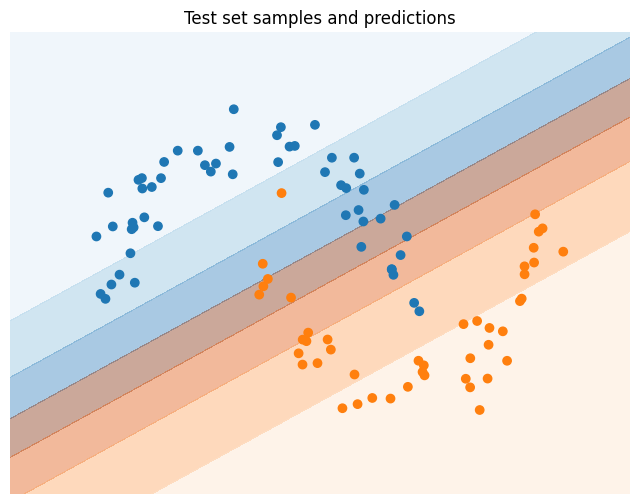

In [20]:
visualize_decision_boundary(log_regressor)

Clearly it's doing much better than it was when it was still untrained.

## Case Study 2: Multi-Layer Perceptron

The main limitation of our previous model is its *capacity*. A linear model simply cannot separate these non-linear 
data. To address this we'll add a second **hidden** layer to the network. This 2-layer Neural Network is referred to as a Multi-Layer Perceptron (MLP).

In [38]:
# Input layer: this has no trainable parameters, but helps keras know the
# shape of the input it will be expecting.
inp = tf.keras.layers.Input(shape=(2,)) 

# Hidden layer: will be a Dense layer with 3 neurons and a sigmoid activation.
# the final parameter is to show that it's connected after layer 'inp', i.e.
# its input is layer 'inp's output.
hid = tf.keras.layers.Dense(3, activation='sigmoid')(inp)

# Output layer: will be again a Dense layer with 1 neuron and a sigmoid 
# activation. This layer is connected after layer 'hid', i.e. its input is layer
# 'hid's output.
out = tf.keras.layers.Dense(1, activation='sigmoid')(hid)

# Define a keras model whose input is layer 'inp' and output is layer 'out'
mlp = tf.keras.models.Model(inp, out)

The structure to the network is similar to what we built before, but between the input and output layers we added a new layer. Because of the non-linear natuer of this layer (due to the sigmoid activation), this network can now model non-linear relationships between input and output.

As we stated before, the input and output shapes are dictated by the problem we have to solve. However, the size of the hidden layer (i.e. $3$ in our case) is a **design choice**. The higher the value, the more parameters our network will have and the more complex functions it can model, which essentially will increase its capacity! This, along with the number of hidden layers and even the activations on these hidden layers are treated as **hyper-parameters**. 

### Deeper dive into the Keras API

Now that we're getting more familiar with how we can define models in keras, it is a good time to point out a few things:

1. We could have omitted the `Input` layer by adding the parameter `input_shape` to the first `Dense` layer. I prefer to use `Input` layers, though.

2. This is Keras' [**Functional API**](https://www.tensorflow.org/guide/keras/functional). Keras also has an arguably more user-friendly API called [Sequential](https://keras.io/getting-started/sequential-model-guide/). This however is much **more limited** than the functional and so we won't be using it. If we were, our models would look like this:
```python
mlp = tf.keras.models.Sequential([  # define sequential model and add individual
      tf.keras.layers.Input(shape=(2,))  # layers as lists
      tf.keras.layers.Dense(3, activation='sigmoid')
      tf.keras.layers.Dense(1, activation='sigmoid')
      ])
# or equivalently
mlp = tf.keras.models.Sequential()  # define an empty Sequential model
mlp.add(tf.keras.layers.Input(shape=(2,)))  # add layers one by one
mlp.add(tf.keras.layers.Dense(3, activation='sigmoid'))
mlp.add(tf.keras.layers.Dense(1, activation='sigmoid'))
```  

3. Most people import each object separately when using Keras. This is also Keras' [official recommendataion](https://keras.io/#getting-started-30-seconds-to-keras). This would look like this:
```python
from tf.keras.layers import Input, Dense
from tf.keras.models import Model
inp = Input(shape=(2,))
hid = Dense(3, activation='sigmoid')(inp)
out = Dense(1, activation='sigmoid')(hid)
mlp = Model(inp, out)
```
I prefer not to go back and forth when forgetting to import a layer, so I call everything from `tf`. Another option is how [TensorFlow docs](https://www.tensorflow.org/guide/keras/functional) recommend it:
```python
from tesorflow import keras  # I don't recommend this because it might be
                             # be confused with the original keras package:
                             # https://keras.io/
from tesorflow.keras import layers  # This isn't a bad idea though
inp = layers.Input(shape=(2,))
hid = layers.Dense(3, activation='sigmoid')(inp)
out = layers.Dense(1, activation='sigmoid')(hid)
mlp = keras.Model(inp, out)
```
You can use any way that suits your style :) 


### MLP Architecture Details

The architecure we created can be seen in the figure below:

![](https://github.com/djib2011/tensorflow-training/blob/main/figures/mlp.png)

Let's inspect the model's architecture through it's built in `.summary()` method.

In [35]:
mlp.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 2)]               0         
                                                                 
 dense_29 (Dense)            (None, 3)                 9         
                                                                 
 dense_30 (Dense)            (None, 1)                 4         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


Our MLP has $13$ total parameters ($9$ in the hidden layer and $4$ in the output). Where do these numbers come from?

Essentially our MLP, performs the following operation:

$$
h = \sigma (X \cdot W_h + b_h) \\
\hat y = \sigma (h \cdot W_o + b_o)
$$

where: $X$ is the input, $W_h$ and $b_h$ are the weights and biases of the hidden layer and $W_o, b_o$ are the respective weights and biases of the output layer.

- Since we selected the hidden layer to have $3$ neurons, $W_h$ has a shape of $2 \times 3 = 6$ and $b_h$ has a shape of $3$, in total $9$ trainable parameters for this layer.
- The output layer sees the output of the hidden layer as its input (i.e. an input dim of $3$). As such, $W_o$ has a shape of $3 \times 1 = 3$ and $b_o$ has a shape of $1$, in total $4$ trainable parameters for this layer.


### Train and evaluate the MLP

Let's see if we can improve our performance with this architectural tweak

In [39]:
mlp.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

mlp.fit(X_train, y_train, epochs=500)  # train for more epochs than before

Epoch 1/500
7/7 [==============================] - 0s 2ms/step - loss: 0.6534 - accuracy: 0.5224
Epoch 2/500
7/7 [==============================] - 0s 2ms/step - loss: 0.6522 - accuracy: 0.5224
Epoch 3/500
7/7 [==============================] - 0s 2ms/step - loss: 0.6513 - accuracy: 0.5224
Epoch 4/500
7/7 [==============================] - 0s 2ms/step - loss: 0.6505 - accuracy: 0.5224
Epoch 5/500
7/7 [==============================] - 0s 1ms/step - loss: 0.6494 - accuracy: 0.5224
Epoch 6/500
7/7 [==============================] - 0s 2ms/step - loss: 0.6486 - accuracy: 0.5224
Epoch 7/500
7/7 [==============================] - 0s 2ms/step - loss: 0.6475 - accuracy: 0.5224
Epoch 8/500
7/7 [==============================] - 0s 2ms/step - loss: 0.6467 - accuracy: 0.5274
Epoch 9/500
7/7 [==============================] - 0s 2ms/step - loss: 0.6458 - accuracy: 0.5274
Epoch 10/500
7/7 [==============================] - 0s 2ms/step - loss: 0.6450 - accuracy: 0.5323
Epoch 11/500
7/7 [===========

7/7 [==============================] - 0s 2ms/step - loss: 0.5255 - accuracy: 0.8458
Epoch 168/500
7/7 [==============================] - 0s 2ms/step - loss: 0.5247 - accuracy: 0.8458
Epoch 169/500
7/7 [==============================] - 0s 2ms/step - loss: 0.5240 - accuracy: 0.8458
Epoch 170/500
7/7 [==============================] - 0s 2ms/step - loss: 0.5233 - accuracy: 0.8458
Epoch 171/500
7/7 [==============================] - 0s 2ms/step - loss: 0.5226 - accuracy: 0.8458
Epoch 172/500
7/7 [==============================] - 0s 2ms/step - loss: 0.5219 - accuracy: 0.8458
Epoch 173/500
7/7 [==============================] - 0s 1ms/step - loss: 0.5213 - accuracy: 0.8458
Epoch 174/500
7/7 [==============================] - 0s 2ms/step - loss: 0.5206 - accuracy: 0.8458
Epoch 175/500
7/7 [==============================] - 0s 2ms/step - loss: 0.5199 - accuracy: 0.8458
Epoch 176/500
7/7 [==============================] - 0s 2ms/step - loss: 0.5192 - accuracy: 0.8458
Epoch 177/500
7/7 [=====

7/7 [==============================] - 0s 1ms/step - loss: 0.4346 - accuracy: 0.8408
Epoch 332/500
7/7 [==============================] - 0s 2ms/step - loss: 0.4340 - accuracy: 0.8408
Epoch 333/500
7/7 [==============================] - 0s 2ms/step - loss: 0.4336 - accuracy: 0.8408
Epoch 334/500
7/7 [==============================] - 0s 2ms/step - loss: 0.4332 - accuracy: 0.8408
Epoch 335/500
7/7 [==============================] - 0s 2ms/step - loss: 0.4328 - accuracy: 0.8408
Epoch 336/500
7/7 [==============================] - 0s 1ms/step - loss: 0.4324 - accuracy: 0.8408
Epoch 337/500
7/7 [==============================] - 0s 2ms/step - loss: 0.4320 - accuracy: 0.8408
Epoch 338/500
7/7 [==============================] - 0s 2ms/step - loss: 0.4315 - accuracy: 0.8408
Epoch 339/500
7/7 [==============================] - 0s 2ms/step - loss: 0.4311 - accuracy: 0.8408
Epoch 340/500
7/7 [==============================] - 0s 2ms/step - loss: 0.4307 - accuracy: 0.8408
Epoch 341/500
7/7 [=====

7/7 [==============================] - 0s 1ms/step - loss: 0.3816 - accuracy: 0.8308
Epoch 496/500
7/7 [==============================] - 0s 2ms/step - loss: 0.3813 - accuracy: 0.8308
Epoch 497/500
7/7 [==============================] - 0s 2ms/step - loss: 0.3811 - accuracy: 0.8308
Epoch 498/500
7/7 [==============================] - 0s 2ms/step - loss: 0.3809 - accuracy: 0.8308
Epoch 499/500
7/7 [==============================] - 0s 2ms/step - loss: 0.3806 - accuracy: 0.8308
Epoch 500/500
7/7 [==============================] - 0s 1ms/step - loss: 0.3804 - accuracy: 0.8308


4/4 [==============================] - 0s 2ms/step - loss: 0.3586 - accuracy: 0.8788


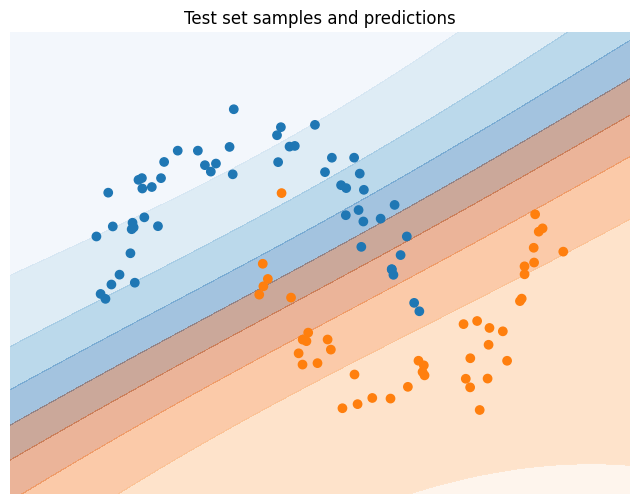

In [40]:
mlp.evaluate(X_test, y_test)

visualize_decision_boundary(mlp)

Interestingly, even though we added a non-linear hidden layer, our model wasn't able to learn more than a linear relationship on the data. 


## Case Study 3: Fine-tuned MLP architecture 

We'll now try to make some architectural changes to our MLP so that it can actually achieve what we wanted, i.e. be able to learn a non-linear function. 

### Increase capacity 

First, we'll try increasins the size of the hidden layer so that our network can model more complex functions.

In [50]:
inp = tf.keras.layers.Input(shape=(2,)) 
hid = tf.keras.layers.Dense(30, activation='sigmoid')(inp)  # 10x the size of the hidden layer
out = tf.keras.layers.Dense(1, activation='sigmoid')(hid)

mlp = tf.keras.models.Model(inp, out)

In [51]:
mlp.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

mlp.fit(X_train, y_train, epochs=500)

Epoch 1/500
7/7 [==============================] - 0s 2ms/step - loss: 0.7738 - accuracy: 0.5224
Epoch 2/500
7/7 [==============================] - 0s 2ms/step - loss: 0.7555 - accuracy: 0.5224
Epoch 3/500
7/7 [==============================] - 0s 2ms/step - loss: 0.7431 - accuracy: 0.5224
Epoch 4/500
7/7 [==============================] - 0s 2ms/step - loss: 0.7317 - accuracy: 0.5224
Epoch 5/500
7/7 [==============================] - 0s 2ms/step - loss: 0.7233 - accuracy: 0.5224
Epoch 6/500
7/7 [==============================] - 0s 2ms/step - loss: 0.7166 - accuracy: 0.5224
Epoch 7/500
7/7 [==============================] - 0s 2ms/step - loss: 0.7111 - accuracy: 0.5224
Epoch 8/500
7/7 [==============================] - 0s 2ms/step - loss: 0.7084 - accuracy: 0.5224
Epoch 9/500
7/7 [==============================] - 0s 2ms/step - loss: 0.7051 - accuracy: 0.5224
Epoch 10/500
7/7 [==============================] - 0s 2ms/step - loss: 0.7037 - accuracy: 0.5224
Epoch 11/500
7/7 [===========

7/7 [==============================] - 0s 2ms/step - loss: 0.5402 - accuracy: 0.8159
Epoch 168/500
7/7 [==============================] - 0s 1ms/step - loss: 0.5394 - accuracy: 0.8159
Epoch 169/500
7/7 [==============================] - 0s 2ms/step - loss: 0.5384 - accuracy: 0.8259
Epoch 170/500
7/7 [==============================] - 0s 2ms/step - loss: 0.5374 - accuracy: 0.8259
Epoch 171/500
7/7 [==============================] - 0s 2ms/step - loss: 0.5364 - accuracy: 0.8209
Epoch 172/500
7/7 [==============================] - 0s 2ms/step - loss: 0.5356 - accuracy: 0.8259
Epoch 173/500
7/7 [==============================] - 0s 2ms/step - loss: 0.5350 - accuracy: 0.8159
Epoch 174/500
7/7 [==============================] - 0s 1ms/step - loss: 0.5340 - accuracy: 0.8209
Epoch 175/500
7/7 [==============================] - 0s 1ms/step - loss: 0.5332 - accuracy: 0.8159
Epoch 176/500
7/7 [==============================] - 0s 2ms/step - loss: 0.5321 - accuracy: 0.8259
Epoch 177/500
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 0.4197 - accuracy: 0.8209
Epoch 332/500
7/7 [==============================] - 0s 2ms/step - loss: 0.4193 - accuracy: 0.8259
Epoch 333/500
7/7 [==============================] - 0s 2ms/step - loss: 0.4186 - accuracy: 0.8259
Epoch 334/500
7/7 [==============================] - 0s 1ms/step - loss: 0.4182 - accuracy: 0.8259
Epoch 335/500
7/7 [==============================] - 0s 2ms/step - loss: 0.4175 - accuracy: 0.8259
Epoch 336/500
7/7 [==============================] - 0s 2ms/step - loss: 0.4170 - accuracy: 0.8259
Epoch 337/500
7/7 [==============================] - 0s 2ms/step - loss: 0.4164 - accuracy: 0.8259
Epoch 338/500
7/7 [==============================] - 0s 2ms/step - loss: 0.4160 - accuracy: 0.8159
Epoch 339/500
7/7 [==============================] - 0s 2ms/step - loss: 0.4154 - accuracy: 0.8209
Epoch 340/500
7/7 [==============================] - 0s 2ms/step - loss: 0.4149 - accuracy: 0.8159
Epoch 341/500
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 0.3600 - accuracy: 0.8259
Epoch 496/500
7/7 [==============================] - 0s 2ms/step - loss: 0.3598 - accuracy: 0.8259
Epoch 497/500
7/7 [==============================] - 0s 2ms/step - loss: 0.3595 - accuracy: 0.8308
Epoch 498/500
7/7 [==============================] - 0s 1ms/step - loss: 0.3592 - accuracy: 0.8308
Epoch 499/500
7/7 [==============================] - 0s 2ms/step - loss: 0.3590 - accuracy: 0.8259
Epoch 500/500
7/7 [==============================] - 0s 2ms/step - loss: 0.3586 - accuracy: 0.8308


4/4 [==============================] - 0s 2ms/step - loss: 0.3334 - accuracy: 0.8586


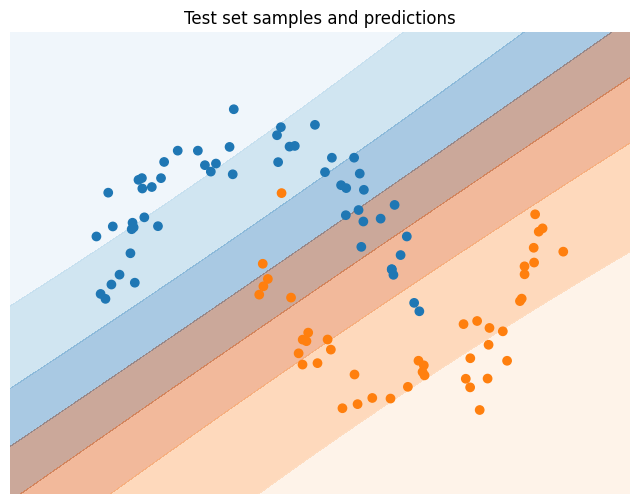

In [52]:
mlp.evaluate(X_test, y_test)

visualize_decision_boundary(mlp)

### Change hiddel layer activation

We'll start by changing the sigmoid activation of the hidden layer to another non-linear function, [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)).

In [53]:
inp = tf.keras.layers.Input(shape=(2,)) 
hid = tf.keras.layers.Dense(30, activation='relu')(inp)  # change the activation of the hidden layer
out = tf.keras.layers.Dense(1, activation='sigmoid')(hid)

mlp = tf.keras.models.Model(inp, out)

In [54]:
mlp.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

mlp.fit(X_train, y_train, epochs=500)  # train for more epochs than before

Epoch 1/500
7/7 [==============================] - 0s 1ms/step - loss: 0.7361 - accuracy: 0.4826
Epoch 2/500
7/7 [==============================] - 0s 2ms/step - loss: 0.7250 - accuracy: 0.4876
Epoch 3/500
7/7 [==============================] - 0s 2ms/step - loss: 0.7142 - accuracy: 0.4975
Epoch 4/500
7/7 [==============================] - 0s 2ms/step - loss: 0.7040 - accuracy: 0.5174
Epoch 5/500
7/7 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.5423
Epoch 6/500
7/7 [==============================] - 0s 2ms/step - loss: 0.6859 - accuracy: 0.5224
Epoch 7/500
7/7 [==============================] - 0s 2ms/step - loss: 0.6780 - accuracy: 0.4975
Epoch 8/500
7/7 [==============================] - 0s 3ms/step - loss: 0.6702 - accuracy: 0.4925
Epoch 9/500
7/7 [==============================] - 0s 2ms/step - loss: 0.6627 - accuracy: 0.5323
Epoch 10/500
7/7 [==============================] - 0s 2ms/step - loss: 0.6562 - accuracy: 0.5970
Epoch 11/500
7/7 [===========

7/7 [==============================] - 0s 2ms/step - loss: 0.3180 - accuracy: 0.8408
Epoch 168/500
7/7 [==============================] - 0s 2ms/step - loss: 0.3173 - accuracy: 0.8408
Epoch 169/500
7/7 [==============================] - 0s 2ms/step - loss: 0.3167 - accuracy: 0.8458
Epoch 170/500
7/7 [==============================] - 0s 2ms/step - loss: 0.3163 - accuracy: 0.8408
Epoch 171/500
7/7 [==============================] - 0s 2ms/step - loss: 0.3157 - accuracy: 0.8408
Epoch 172/500
7/7 [==============================] - 0s 2ms/step - loss: 0.3151 - accuracy: 0.8408
Epoch 173/500
7/7 [==============================] - 0s 2ms/step - loss: 0.3146 - accuracy: 0.8408
Epoch 174/500
7/7 [==============================] - 0s 2ms/step - loss: 0.3144 - accuracy: 0.8458
Epoch 175/500
7/7 [==============================] - 0s 2ms/step - loss: 0.3135 - accuracy: 0.8458
Epoch 176/500
7/7 [==============================] - 0s 2ms/step - loss: 0.3131 - accuracy: 0.8458
Epoch 177/500
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 0.2706 - accuracy: 0.8607
Epoch 332/500
7/7 [==============================] - 0s 2ms/step - loss: 0.2705 - accuracy: 0.8557
Epoch 333/500
7/7 [==============================] - 0s 2ms/step - loss: 0.2703 - accuracy: 0.8557
Epoch 334/500
7/7 [==============================] - 0s 2ms/step - loss: 0.2702 - accuracy: 0.8557
Epoch 335/500
7/7 [==============================] - 0s 2ms/step - loss: 0.2700 - accuracy: 0.8557
Epoch 336/500
7/7 [==============================] - 0s 2ms/step - loss: 0.2699 - accuracy: 0.8557
Epoch 337/500
7/7 [==============================] - 0s 2ms/step - loss: 0.2699 - accuracy: 0.8557
Epoch 338/500
7/7 [==============================] - 0s 1ms/step - loss: 0.2697 - accuracy: 0.8657
Epoch 339/500
7/7 [==============================] - 0s 2ms/step - loss: 0.2695 - accuracy: 0.8557
Epoch 340/500
7/7 [==============================] - 0s 2ms/step - loss: 0.2693 - accuracy: 0.8557
Epoch 341/500
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 0.2553 - accuracy: 0.8607
Epoch 496/500
7/7 [==============================] - 0s 2ms/step - loss: 0.2551 - accuracy: 0.8607
Epoch 497/500
7/7 [==============================] - 0s 1ms/step - loss: 0.2551 - accuracy: 0.8607
Epoch 498/500
7/7 [==============================] - 0s 1ms/step - loss: 0.2551 - accuracy: 0.8607
Epoch 499/500
7/7 [==============================] - 0s 2ms/step - loss: 0.2551 - accuracy: 0.8607
Epoch 500/500
7/7 [==============================] - 0s 2ms/step - loss: 0.2549 - accuracy: 0.8607


4/4 [==============================] - 0s 2ms/step - loss: 0.2457 - accuracy: 0.9091


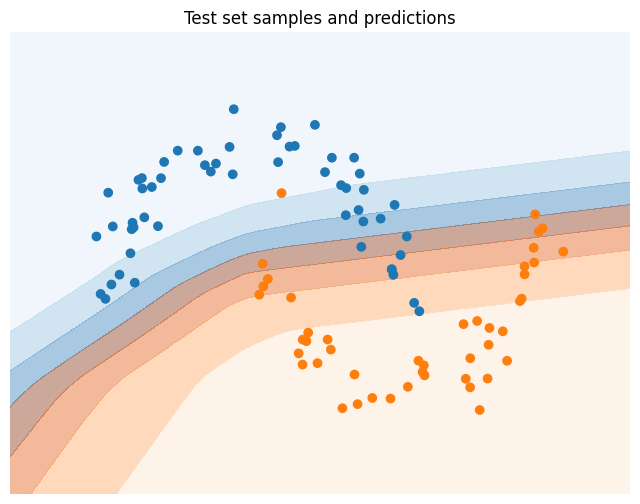

In [55]:
mlp.evaluate(X_test, y_test)

visualize_decision_boundary(mlp)

With these two changes, we can see both in the evaluation metrics and in the visualization that we are moving in the right direction. Our model is starting to learn the data better. 

### Your turn

For exercise try to improve performance even more with the methods we've presented up till now. Some things you can try:

- Further increase the size of the hidden layer
- Allow the network to train for even longer
- Try adding another hidden layer (inp --> hid1 --> hid2 --> out)

With these changes you should be able to achieve an even stroner classification performance like the following:

![](https://github.com/djib2011/tensorflow-training/blob/main/figures/mlp_moons.png)